
# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mvsd(a):
  m = sum(a)/len(a)
  v = sum((m-x)**2 for x in a)/(len(a)-1)
  sd = v**0.5
  return (m, v, sd)

sales_m, sales_v, sales_stdev = mvsd(sales)
print("Mean:", sales_m)
print("Variance:", sales_v)
print("Stdev:", sales_stdev)

Mean: 3052.714285714286
Variance: 214387.90476190473
Stdev: 463.0204150595357


In [60]:
# check work

print("Mean:", np.mean(sales))
print("Variance:", np.var(sales, ddof=1))
print("Stdev:", np.std(sales, ddof=1))


Mean: 3052.714285714286
Variance: 214387.90476190473
Stdev: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [57]:
customers = [127, 80, 105, 92, 120, 115, 93]
df = pd.DataFrame({"customers": customers, "sales": sales})
cov = df.cov()
cov

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [58]:
cust_m, cust_v, cust_stdev = mvsd(customers)
cov.loc["sales", "customers"]/(cust_stdev * sales_stdev)

0.9628339778148909

In [61]:
df.corr()

TypeError: ignored

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", index_col=0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [34]:
df["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [35]:
sex_to_num = {"male": 1, "female": 2}
df["sex"] = df["sex"].applymap(sex_to_num)
df["sex"].head()

1    2.0
2    1.0
3    2.0
4    1.0
5    2.0
Name: sex, dtype: float64

In [36]:
numeric = df[["pclass", "survived", "sex", "age", "sibsp", "parch", "ticket", "fare", "boat", "body", "has_cabin_number"]]
numeric.cov()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-0.050011,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,0.123090,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
sex,-0.050011,0.123090,0.229438,-0.354202,0.054690,0.088362,4.600321,0.387672,0.027508
age,-3.954605,-0.314343,-0.354202,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,0.054690,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,0.088362,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,4.600321,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,0.387672,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,0.027508,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [37]:
numeric.corr()

,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.124617,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,0.528693,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
sex,-0.124617,0.528693,1.000000,-0.057398,0.109609,0.213125,0.185523,0.015903,0.137396
age,-0.366370,-0.050199,-0.057398,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,0.109609,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,0.213125,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.185523,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.015903,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.137396,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(0, 600)

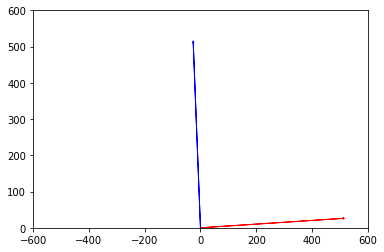

In [44]:
fig, ax = plt.subplots()

ax.arrow(0, 0, 511, 26, head_width=5, head_length=5, color="red")
ax.arrow(0, 0, -26, 511, head_width=5, head_length=5, color="blue")

ax.set_xlim([-600, 600])
ax.set_ylim([0, 600])

In [0]:
# a synonym is "diagonal".

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [45]:
a = np.array([-5, 3, 7])
b = np.array([6, 8, 2])

np.dot(a, b)

8

In [0]:
# no, because the dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [47]:
np.linalg.norm(c)**2

665.0

In [48]:
np.dot(c, c)

665

In [49]:
np.dot(c.T, c)

665

In [0]:
# all are the sum of the squares

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7\hat{i} + 12\hat{j}$

$e = 2\hat{i} + 11\hat{j} - 8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [69]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)
f/f_norm

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-1, 1)

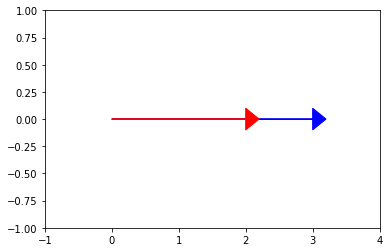

In [52]:
fig, ax = plt.subplots()

ax.arrow(0, 0, 3, 0, head_width=0.2, head_length=0.2, color="blue")
ax.arrow(0, 0, 2, 0, head_width=0.2, head_length=0.2, color="red")

ax.set_xlim([-1, 4])
ax.set_ylim([-1, 1])

(-1, 4)

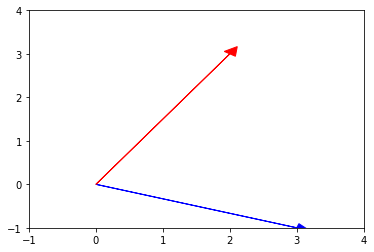

In [53]:
fig, ax = plt.subplots()

ax.arrow(0, 0, 3, -1, head_width=0.2, head_length=0.2, color="blue")
ax.arrow(0, 0, 2, 3, head_width=0.2, head_length=0.2, color="red")

ax.set_xlim([-1, 4])
ax.set_ylim([-1, 4])

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# the vectors are co-linear

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

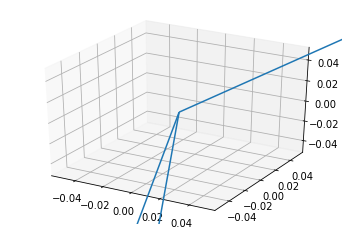

In [63]:
# The vectors do not appear to lie on a 2-dimensional space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



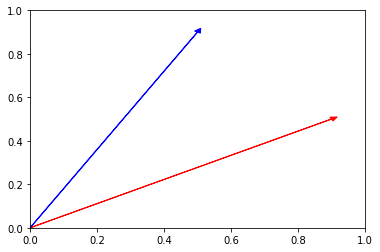

In [66]:
fig, ax = plt.subplots()

ax.arrow(0, 0, 0.9, 0.5, head_width=0.02, head_length=0.02, color="red")
ax.arrow(0, 0, 0.5, 0.9, head_width=0.02, head_length=0.02, color="blue")

## 6.2 What does it mean to form a basis?

It means that the vectors define a line or plane.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [64]:
P = [[1, 2, 3], [-1, 0, 7], [4, 8, 2]]
P = np.array(P)

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It tells us what dimensional space the matrix takes up.

In the case of the above example it occupies $\mathbb{R}^{3}$.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

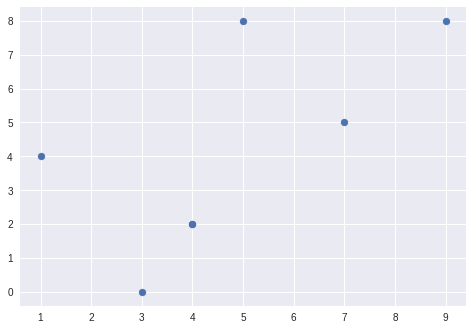

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()